## Multi Variate Logistic Regression
- The notebook implements a logistic regression model to classify bank notes as 'authentic' or 'fake'
- We use a data set with the following features;
    - Variance of Wavelet Transformed image (continuous)
    - Skewness of Wavelet Transformed image (continuous)
    - Curtosis of Wavelet Transformed image (continuous)
    - Entropy of image (continuous)
    - Class (integer)
- Total Instance : 1372
- Data Source
    - https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Assignment
1. Consider the Logistic Regression Model for bank notes authentication (see 02_LogisticRegression.ipynb)
2. Study about regularization in Scikit-learn
3. Incorporate regularization in the bank notes authentication model.(3 points)
4. Draw a confusion matrix for the out of sample data (3 points)
5. Improve the accuracy of the model on out of sample data (4 points)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

- Import some modules from sklearn Library for regularization

*   List item
*   List item



In [ ]:
!pip install seaborn

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(5, True, 1)

In [ ]:
split = kfold.split()

## Regularization
- There are two regularization technique in Sklearn L1 (Lasso) and L2 (Rigde)
- L1 (Lasso) tries to estimate the median of the data. It helps in feature selection by eliminating the features that are not important, this helps when number of features are large in number.
- L2 (Rigde) tries to estimate the mean of the data to avoid overfitting.


## Reading the data

In [ ]:
path = "02_bankNote.csv"
df = pd.read_csv(path)

X = df.iloc[:, :-1]
Y = df.iloc[:,4]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler =  preprocessing.RobustScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1029
1029
343
343


## Logistic Regression With penalty L1

In [ ]:
model_l1 = LogisticRegression(penalty='l1', C=0.003, solver='liblinear')
model_l1.fit(X_train,Y_train)

print(model_l1.intercept_)
print(model_l1.coef_)

[0.]
[[0. 0. 0. 0.]]


## Logistic Regression With penalty L2

In [ ]:
model_l2 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model_l2.fit(X_train,Y_train)

print(model_l2.intercept_)
print(model_l2.coef_)

[-0.36109873]
[[-5.03366307 -4.23564394 -2.85547841  0.        ]]


In [ ]:
score_l1 = model_l1.score(X_test, Y_test)

In [ ]:
score_l2 = model_l2.score(X_test, Y_test)

In [ ]:
score_l1

0.5685131195335277

In [ ]:
score_l2

0.9650145772594753

## Applying L2 Regularization  (Rigde)

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X, Y)

#######################################
# Accuracy
# score = model.score(X_test, Y_test)
y_pred = ridge_pipe.predict(X)

y_pred[y_pred<0.5]=0
y_pred[y_pred>=0.5]=1

score = accuracy_score(Y, y_pred)
print("train accuracy ridge:", score)

train accuracy ridge: 0.9963556851311953


## Applying L1 Regulatization (Lasso)

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.003, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X, Y)
###############################
# score = model.score(X_test, Y_test)
y_pred = lasso_pipe.predict(X)

y_pred[y_pred<0.5]=0
y_pred[y_pred>=0.5]=1

score = accuracy_score(Y, y_pred)
print("train accuracy lasso:", score)

train accuracy lasso: 0.989067055393586


## Out-Sample Data

In [ ]:
path = "02_bankNoteTest.csv"
df = pd.read_csv(path)
X_OS= df.iloc[:, :-1]
Y_OS= df.iloc[:,4]

In [ ]:
X_OS = scaler.fit_transform(X_OS)

## Testing Logistic Regression Model L1

In [ ]:
model_l1.score(X_OS,Y_OS)

0.5454545454545454

## Testing Logistic Regression Model L2

In [ ]:
model_l2.score(X_OS, Y_OS)

0.6363636363636364

## Testing Rigde

In [ ]:
y_pred = ridge_pipe.predict(X_OS)

y_pred[y_pred<0.5]=0
y_pred[y_pred>=0.5]=1

score = accuracy_score(Y_OS, y_pred)
print("test accuracy ridge:", score)

test accuracy ridge: 0.6363636363636364


## Testing Lasso

In [ ]:
y_pred = lasso_pipe.predict(X_OS)

y_pred[y_pred<0.5]=0
y_pred[y_pred>=0.5]=1

score = accuracy_score(Y_OS, y_pred)
print("test accuracy lasso:", score)

test accuracy lasso: 0.6363636363636364


## Elsatinet Both  L1 and L2 regularized (train and test)

- Linear regression with combined L1 and L2 priors as regularizer
- **Formula**
    - $1 / (2 * m) * \sum\limits‎_‎{n=0}^{‎\‎‎infty‎} (y - X \theta)^2_2 + alpha * l1_ratio * (\theta)_1 + 0.5 * alpha * (1 - l1_ratio) * ||\theta||^2_2$

- If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:
- $a * L1 + b * L2$

- $alpha = a + b$ and 
- $l1_ratio = a / (a + b)$
    

In [ ]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0) # ElecticNet model with iterative fitting along a regularization path
regr.fit(X, Y)
y_pred = regr.predict(X_OS)

# for Classification
y_pred[y_pred<0.5]=0 
y_pred[y_pred>=0.5]=1

score = accuracy_score(Y_OS, y_pred)
print("test accuracy ElasticNet:", score)

test accuracy ElasticNet: 0.6363636363636364


## Confusion Matrix

In [ ]:
labels = [0, 1]

width = 5
height = 5

title = "Confusion Matrix"

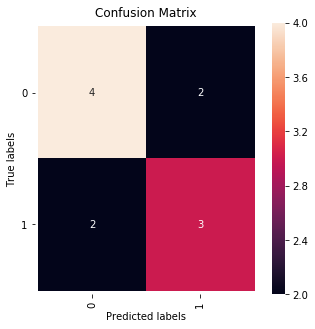

In [ ]:
cm = confusion_matrix(Y_OS, y_pred, labels=labels)
fig = plt.figure(figsize=(width, height))
ax = plt.subplot()
ax = sns.heatmap(cm, annot=True, ax=ax, fmt='d');  # annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(title)
ax.xaxis.set_ticklabels(labels, rotation=90)
ax.yaxis.set_ticklabels(labels, rotation=0)
bottom, top = ax.get_ylim()
left, right = ax.get_xlim()
delta = 0.0325
ax.set_ylim(bottom + delta, top - delta)
ax.set_xlim(left - delta, right + delta)
# plt.savefig(name + ".pdf", bbox_inches='tight')
plt.show()
# return ax

In [ ]:
cm

array([[4, 2],
       [2, 3]], dtype=int64)

## Accuracy Through Confusion Matrix

In [ ]:
TN=cm[0][0]
TP=cm[1][1]
FN= cm[0][1]
FP=cm[1][0]

In [ ]:
accuracyy = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
accuracyy

0.6363636363636364

In [ ]:
Precision=TP/(TP+FP)

In [ ]:
Precision

0.6

- **I think we can not improve the accuracy on this specific set of test data, the reason might be, the test data have different distribution from the train data**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(5, True, 1)

In [ ]:
k = kflod.split()